# Our First CNN in Keras 
### Creating a model based on the MNIST Dataset of Handwrittent Digits

### Step 1: Lets load our dataset

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

# loads the MNIST dataset
x_train = np.load("marathi_digits_x_train_500.npy")
y_train = np.load("marathi_digits_y_train_500.npy")
x_test = np.load("marathi_digits_x_test_500.npy")
y_test = np.load("marathi_digits_y_test_500.npy")
#(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)


(400, 28, 28)


अ


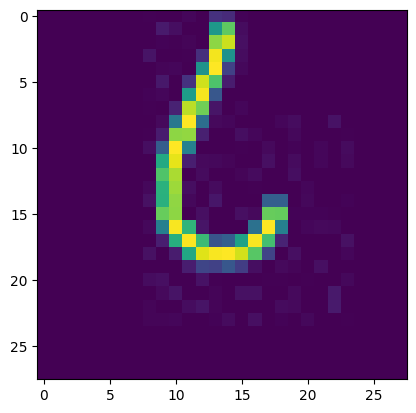

8


In [2]:
import matplotlib.pyplot as plt
num =333
image = x_train[num]
label =y_train[num]
plt.imshow(image)
plt.show()
print(label)

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

In [ ]:
#!pip install opencv-python
!pip install matplotlib

### Step 2A: Examine the size and image dimenions (not required but good practice)
- Check the number of samples, dimenions and whether images are color or grayscale
- We see that our training data consist of **60,000** samples of training data, **10,000** samples of test data
- Our labels are appropriately sized as well
- Our Image dimenions are **28 x 28**, with **no color channels** (i.e. they are grayscale, so no BGR channels)

In [4]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (400, 28, 28)
Number of samples in our training data: 400
Number of labels in our training data: 400
Number of samples in our test data: 100
Number of labels in our test data: 100

Dimensions of x_train:(28, 28)
Labels in x_train:(400,)

Dimensions of x_test:(28, 28)
Labels in y_test:(100,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [11]:
# Using OpenCV
# import opencv and numpy
import cv2 
import numpy as np

# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    print(y_train[random_num])
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)

cv2.destroyAllWindows()     

0
7
2
4
2
2


### Let's do the same thing but using matplotlib to plot 6 images 

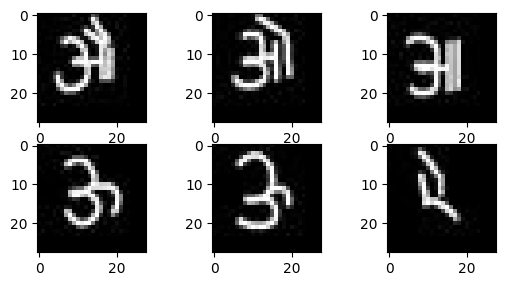

In [5]:
# importing matplot lib
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### Step 3A - Prepare our dataset for training

In [ ]:
x_train[0].shape

In [3]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (400, 28, 28, 1)
400 train samples
100 test samples


### Step 3B - One Hot Encode Our Labels (Y)

In [4]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [15]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [7]:
batch_size = 5
epochs = 20

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
80/80 [==============================] - 4s 46ms/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.1741 - val_accuracy: 0.9300
Epoch 2/20
80/80 [==============================] - 4s 47ms/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.1635 - val_accuracy: 0.9300
Epoch 3/20
80/80 [==============================] - 4s 50ms/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.1657 - val_accuracy: 0.9400
Epoch 4/20
80/80 [==============================] - 4s 47ms/step - loss: 0.0311 - accuracy: 0.9850 - val_loss: 0.1680 - val_accuracy: 0.9400
Epoch 5/20
80/80 [==============================] - 4s 47ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.1598 - val_accuracy: 0.9300
Epoch 6/20
80/80 [==============================] - 4s 55ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1526 - val_accuracy: 0.9300
Epoch 7/20
80/80 [==============================] - 4s 49ms/step - loss: 0.0087 - accuracy: 0.9950 - val_loss: 0.1324 - val_accuracy: 0.9400
Epoch 8/20
80

### Step 6 - Ploting our Loss and Accuracy Charts

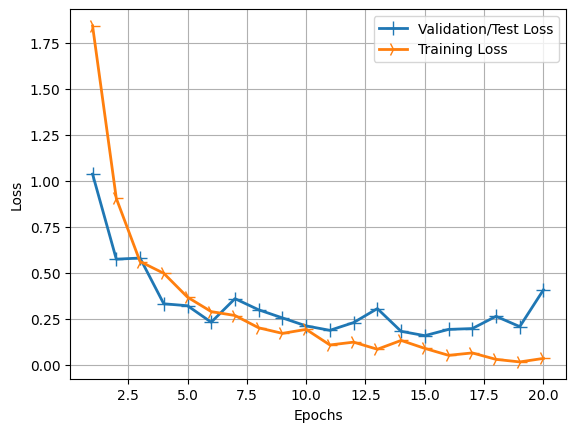

In [6]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

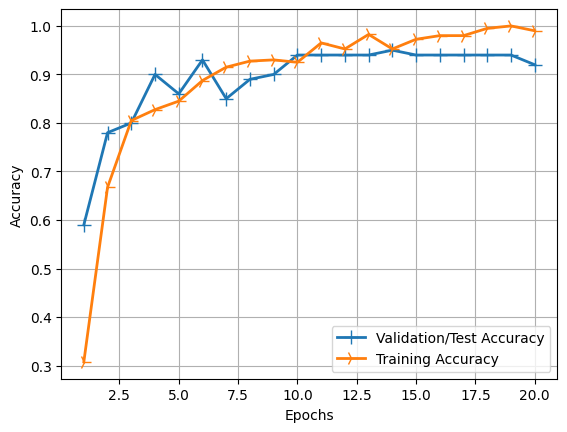

In [7]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A - Saving our Model

In [ ]:
!pip uninstall h5py

In [8]:
model.save("marathi_digits_10_Epochs.h5")
print("Model Saved")

Model Saved


### Step 7B - Loading  our Model

In [14]:
from keras.models import load_model

classifier = load_model('marathi_swar_10_Epochs.h5')

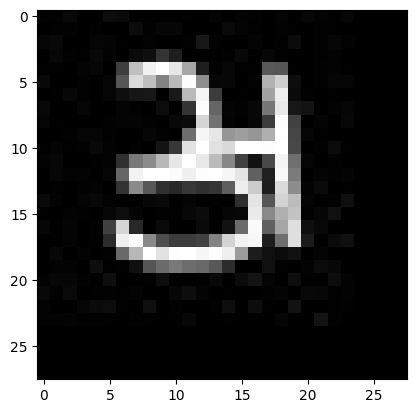

model prediction : आ


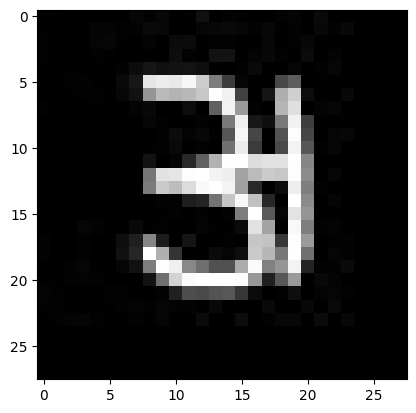

model prediction : आ


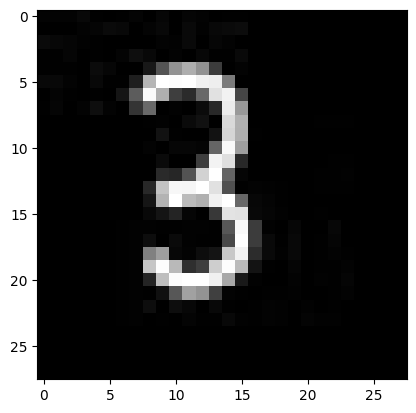

model prediction : उ


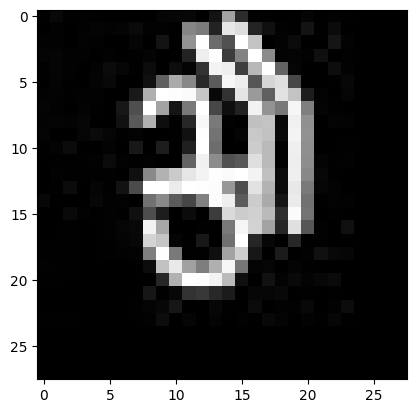

model prediction : अं


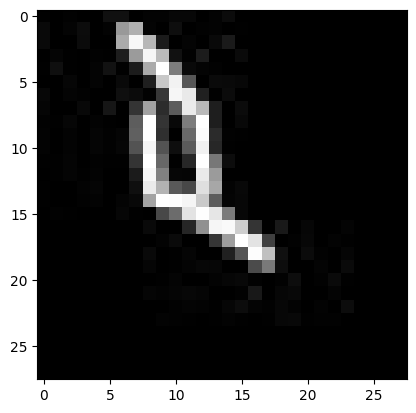

model prediction : ऐ


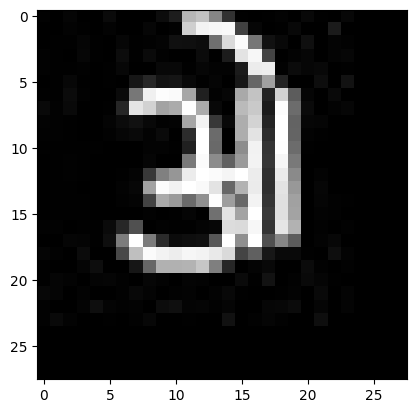

model prediction : ओ


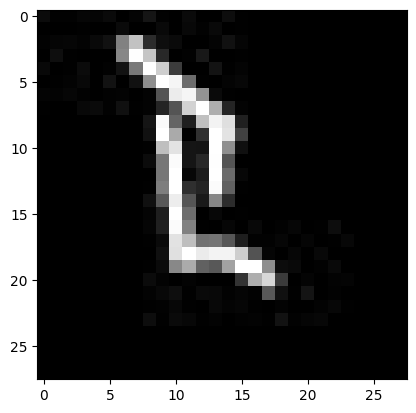

model prediction : ऐ


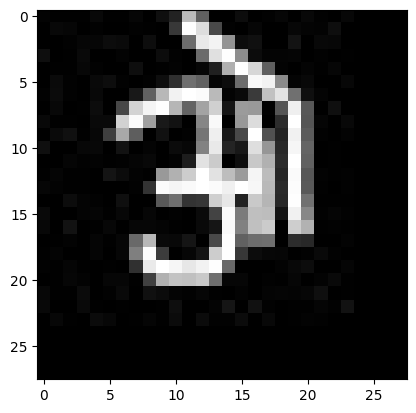

model prediction : ओ


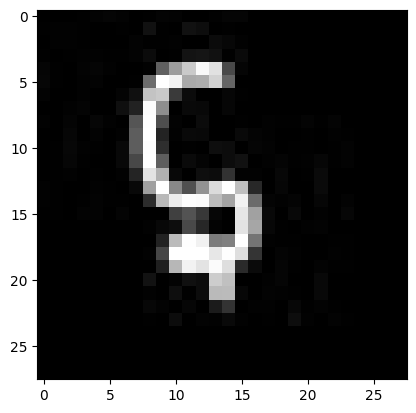

model prediction :  इ


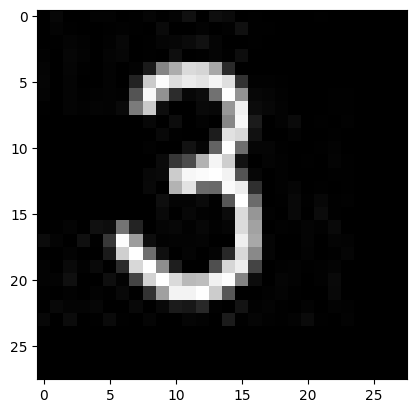

model prediction : उ


In [10]:
import matplotlib.pyplot as plt
import numpy as np
j=50
for i in range(10):
    random_num = np.random.randint(0,100)
    input_im = x_test[random_num]
    plt.imshow(input_im, cmap=plt.get_cmap('gray'))
    plt.show()
    input_im = input_im.reshape(1,28,28,1) 
    res = (classifier.predict(input_im, 1, verbose = 0)[0])
    prediction = np.argmax(res)
    marathiSwar = ['अ','आ',' इ', 'ई','उ','ऊ','ए','ऐ','ओ','अं']
    print('model prediction :',marathiSwar[prediction])
    j = j+1

 

In [ ]:


# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
#plt.subplot(111)
random_num = np.random.randint(0,len(x_train))


### Step 8 - Lets input some of our test data into our classifer

In [23]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict(input_im, 1, verbose = 0)[0])
    print(str(res))
    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

[6.2616897e-14 3.4124767e-10 2.7884161e-16 9.3558633e-12 5.9744629e-08
 9.9999976e-01 5.3850060e-11 9.0043493e-08 1.5842534e-15 6.2404851e-12]
[2.2635706e-12 8.6598888e-09 1.4316649e-09 9.9999976e-01 9.2932294e-11
 6.4313390e-08 2.1902939e-09 6.8821805e-08 5.4167938e-08 1.2153631e-12]
[1.0000000e+00 2.2552238e-12 1.9196048e-10 2.1736831e-14 1.1152846e-08
 6.4793636e-14 4.1144472e-16 3.4692494e-08 1.4790302e-10 8.3763649e-11]
[9.9984157e-01 8.9475432e-12 1.5687254e-12 5.7981926e-17 2.5444222e-13
 2.1949209e-15 9.3554789e-18 1.7084205e-09 3.8451628e-13 1.5837488e-04]
[1.09431326e-07 9.99998808e-01 7.48421680e-09 2.19089635e-10
 4.68726995e-07 5.97866062e-07 1.72286003e-12 1.40951677e-08
 1.01668619e-12 8.87004248e-10]
[1.0309414e-11 1.7806938e-09 2.3165787e-09 9.9999845e-01 3.7614098e-10
 1.8197866e-07 6.0691463e-10 1.2893806e-06 1.9774435e-08 3.2014330e-13]
[5.9668452e-07 1.3120681e-08 1.5493099e-07 6.2993813e-06 1.0874435e-09
 2.8652684e-08 4.9752762e-06 3.7117454e-05 9.9995077e-01 4.3

### Putting All Together!
We don't need to run each section of code separately. Once we know it all works as it's supposed to, we can put all te pieces together and start training our model

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# Training Parameters
batch_size = 128
epochs = 1

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Visualizing Our Model
- First let's re-create our model 

In [ ]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

input_shape = (28,28,1)
num_classes = 10

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary()) 

### Generating the diagram of the model architecture

In [ ]:
# Generate the plot
plot_model(model, to_file = 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 

In [19]:
import numpy as np
from PIL import Image

x = np.array([np.array(Image.open("res.jpg"))])


In [21]:
import matplotlib.pyplot as plt
import numpy as np

input_im =x
plt.imshow(input_im, cmap=plt.get_cmap('gray'))
plt.show()
input_im = input_im.reshape(1,28,28,1) 
res = (classifier.predict(input_im, 1, verbose = 0)[0])
prediction = np.argmax(res)
marathiSwar = ['अ','आ',' इ', 'ई','उ','ऊ','ए','ऐ','ओ','अं']
print('model prediction :',marathiSwar[prediction])

TypeError: Invalid shape (1, 28, 28, 3) for image data